In [569]:
import os
import pandas as pd
import seaborn as sns

%matplotlib inline

In [570]:
!where python

/Users/seb/.pyenv/versions/3.8.10/bin/python
/Users/seb/Documents/capital_on_tap/venv/bin/python
/Users/seb/.pyenv/shims/python
/usr/bin/python


In [571]:
!pip install lifetimes

You should consider upgrading via the '/Users/seb/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


In [572]:
!pwd

/Users/seb/Documents/capital_on_tap


In [573]:
file_name = 'data.csv'
file_dir = '/Users/seb/Documents/capital_on_tap'
file_path = os.path.join(file_dir, file_name)

In [574]:
df = pd.read_csv(file_path)

In [575]:
df.head()

,CustomerId,DateStarted,BillingEndDate,BPnumber,ApprovedLimit,CardFunding,CashFunding,Balance,AverageBalanceInBP,Interest,PaymentsDue,PaymentsMade,RepaymentType,PaymentStatus,Rewards,InterestRate,CoTCreditBand,MonthlyTurnover
0,248401,1/8/18,1/7/19,12,2500,20.00,0.0,20.00,18.06,0.00,20.00,20.00,Paid in full,0,Standard,0.0494,3.0,1875
1,246102,1/8/18,6/7/19,17,4800,0.00,0.0,4424.17,4383.34,158.85,442.42,700.00,Paid partial,0,Standard,0.0356,0.0,2131
2,249501,1/11/18,10/10/18,9,9600,2602.24,0.0,2941.12,5889.28,0.00,294.11,8683.82,Paid in full,0,Premium,0.0187,4.0,109967
3,237401,11/27/17,11/26/18,12,10000,1802.53,0.0,1802.53,1321.06,0.00,250.00,1802.53,Paid in full,0,Standard,0.0394,5.0,33757
4,235763,11/7/17,8/6/18,9,6000,0.00,0.0,4368.51,4236.88,212.97,436.85,436.85,Paid partial,0,Standard,0.0494,1.0,7491


In [101]:
df.shape

(69180, 18)

In [346]:
df.astype(bool).sum(axis=0)

CustomerId            69180
DateStarted           69180
BillingEndDate        69180
BPnumber              69180
ApprovedLimit         66207
CardFunding           26494
CashFunding           15828
Balance               64326
AverageBalanceInBP    65202
Interest              45972
PaymentsDue           63321
PaymentsMade          59697
RepaymentType         69180
PaymentStatus          2919
Rewards               69180
InterestRate          69180
CoTCreditBand         64720
MonthlyTurnover       69180
Interchange           26494
Revenue               58070
CostOfCapital         65202
BadDebt                1006
Cost                  65493
Profit                65535
dtype: int64

In [576]:
# Remove any entries without a CustomerId
df = df[pd.notnull(df['CustomerId'])]
df.shape

(69180, 18)

In [577]:
# Calculate and store Interchange, Interest, Revenue, Cost and Profit for each record
df['Interchange'] = df['CardFunding'] * 0.0163
df['Revenue'] = df['Interchange'] + df['Interest']
df['CostOfCapital'] = 0.0063 * df['AverageBalanceInBP']
df['BadDebt'] = df[df['PaymentStatus'] == 4]['Balance']
df['BadDebt'] = df['BadDebt'].fillna(0)
df['Cost'] = df['CostOfCapital'] + df['BadDebt']
df['Profit'] = df['Revenue'] - df['Cost']

<AxesSubplot: xlabel='MonthlyTurnover', ylabel='Profit'>

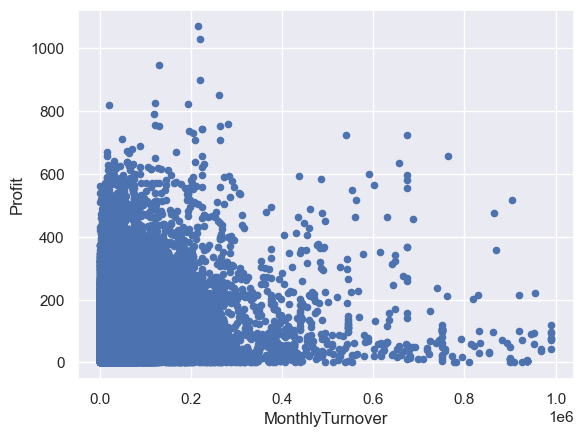

In [673]:
# Check correlation between MonthlyTurnover and calculated Profit
df[(df['Profit'] > 0) & (df['MonthlyTurnover'] < 10**6)].plot.scatter(x = 'MonthlyTurnover', y = 'Profit')

,ApprovedLimit,Revenue
ApprovedLimit,1.00000,0.32832
Revenue,0.32832,1.00000


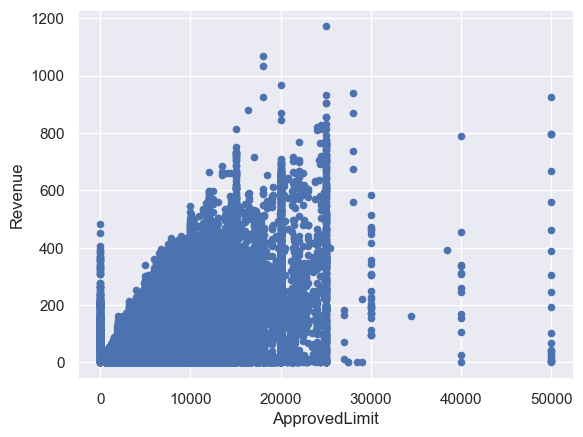

In [697]:
# Check correlation between ApprovedLimit and calculated Revenue
df.plot.scatter(x = 'ApprovedLimit', y = 'Revenue')
df[['ApprovedLimit', 'Revenue']].corr()

In [698]:
df[['ApprovedLimit', 'Profit']].corr()

,ApprovedLimit,Profit
ApprovedLimit,1.000000,0.164716
Profit,0.164716,1.000000


In [105]:
sns.set_theme()

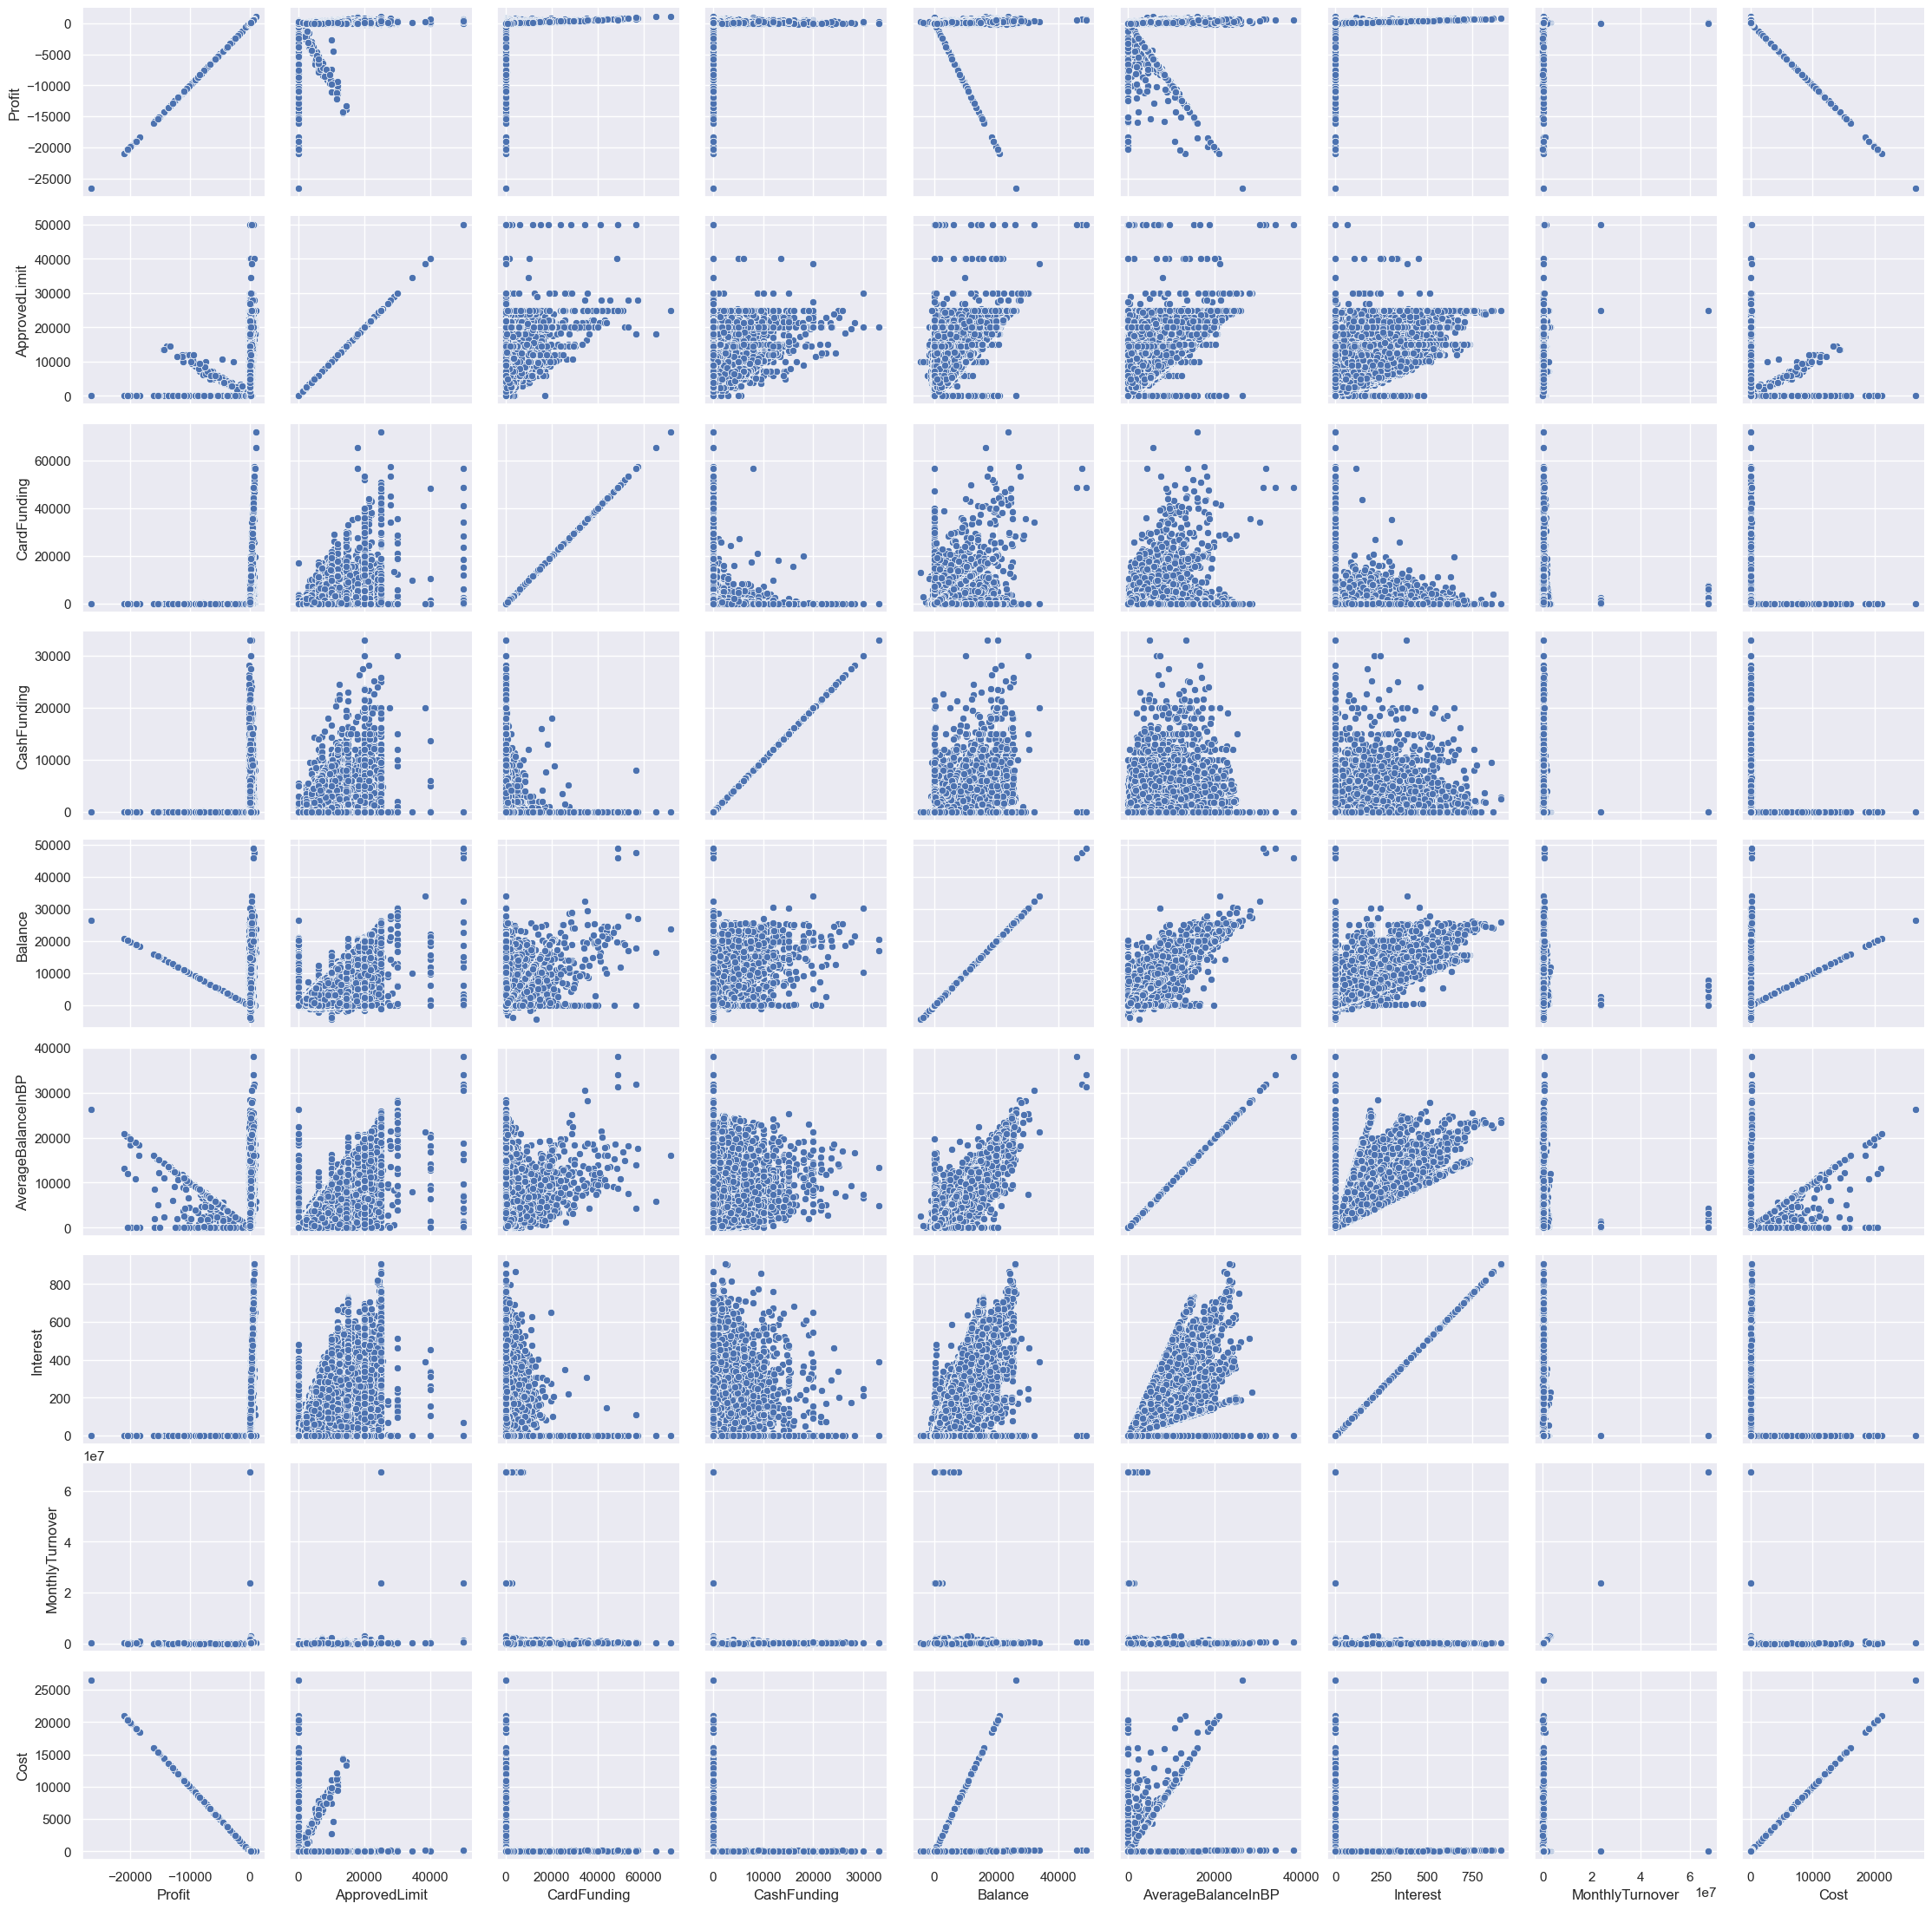

In [689]:
# All Scatter Plots

attributes = ['Profit', 'ApprovedLimit', 'CardFunding', 'CashFunding', 'Balance', 
              'AverageBalanceInBP', 'Interest', 'MonthlyTurnover', 'Cost']
g = sns.PairGrid(df[attributes])
g.map(sns.scatterplot)
matplotlib.pyplot.show()

In [578]:
df[attributes].head()

,Profit,ApprovedLimit,CardFunding,CashFunding,Balance,AverageBalanceInBP,Interest,MonthlyTurnover,Cost
0,0.212222,2500,20.00,0.0,20.00,18.06,0.00,1875,0.113778
1,131.234958,4800,0.00,0.0,4424.17,4383.34,158.85,2131,27.615042
2,5.314048,9600,2602.24,0.0,2941.12,5889.28,0.00,109967,37.102464
3,21.058561,10000,1802.53,0.0,1802.53,1321.06,0.00,33757,8.322678
4,186.277656,6000,0.00,0.0,4368.51,4236.88,212.97,7491,26.692344


/Users/seb/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


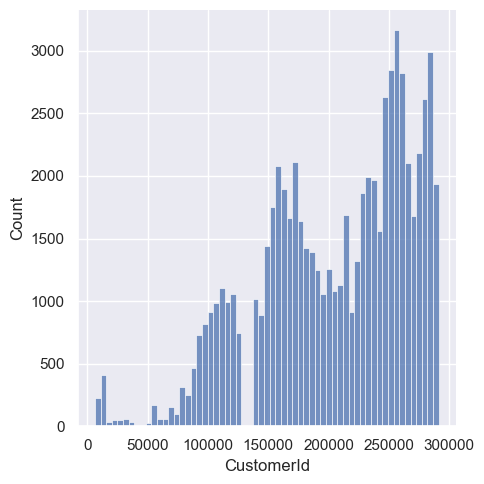

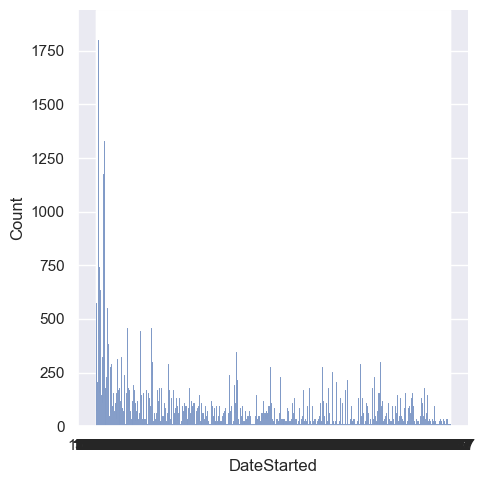

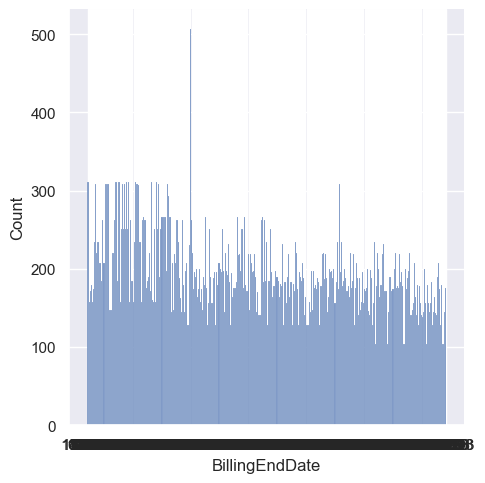

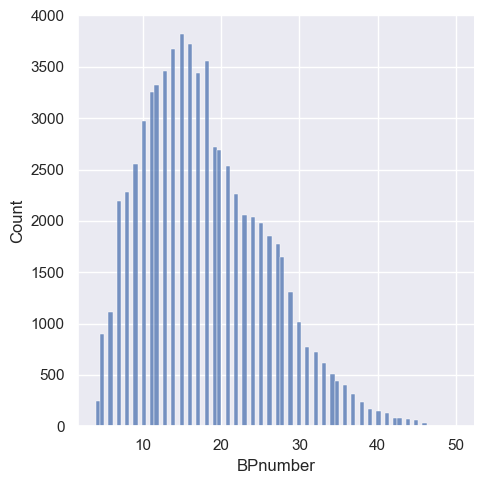

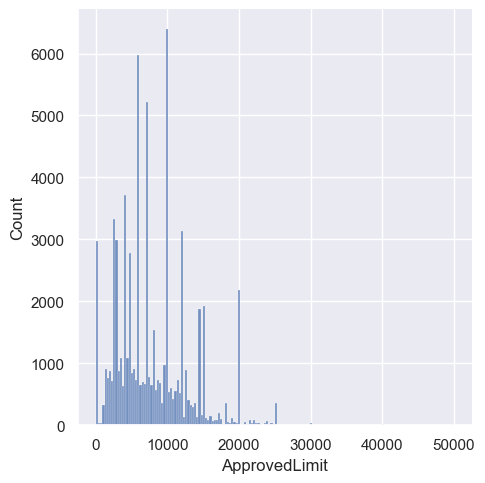

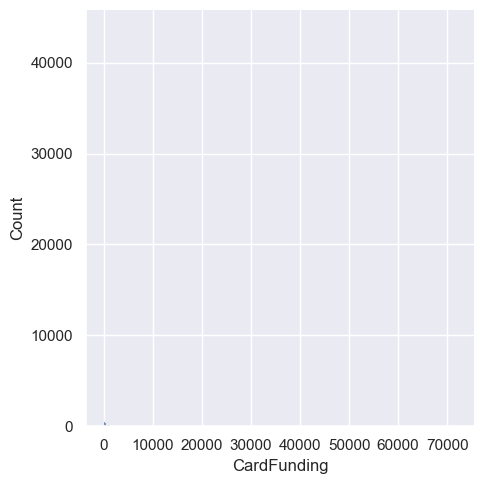

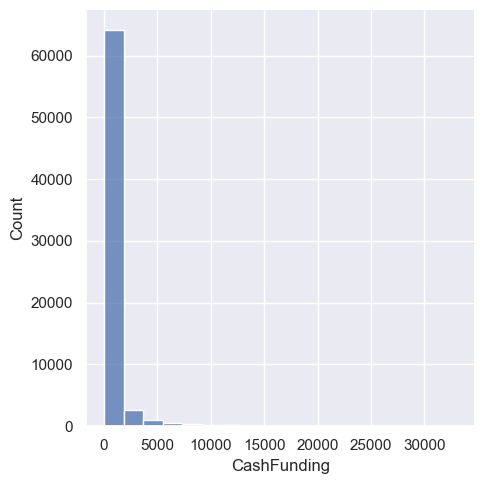

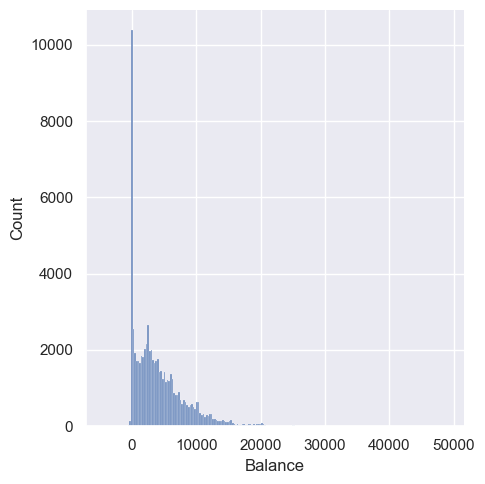

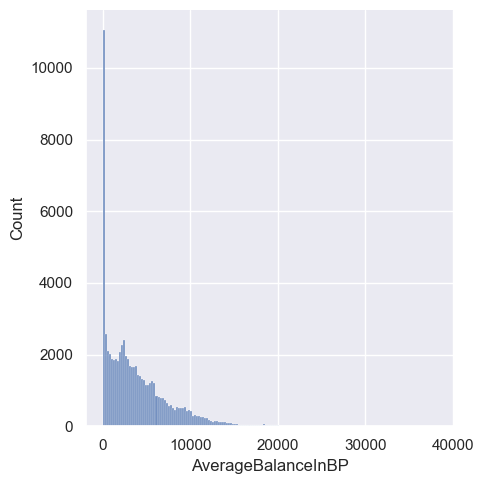

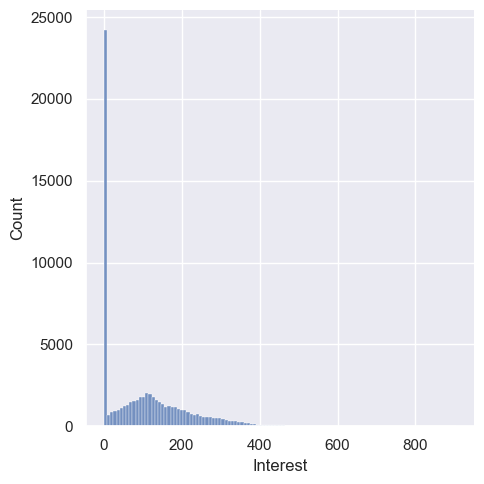

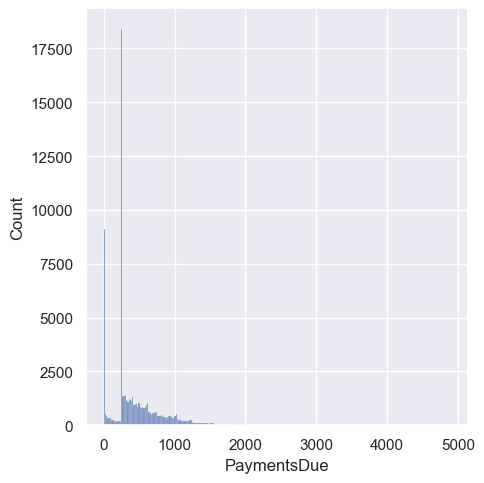

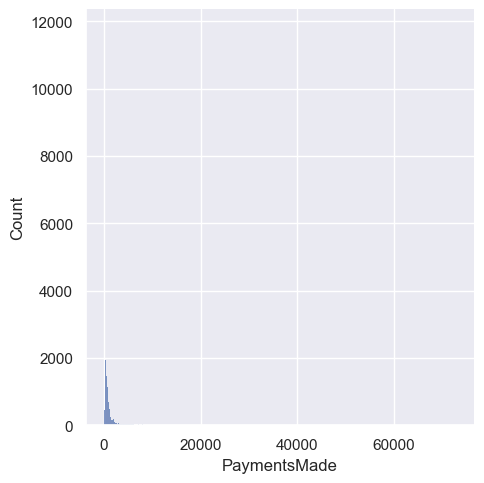

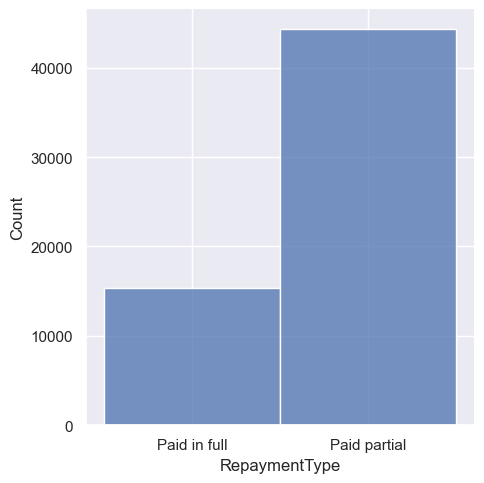

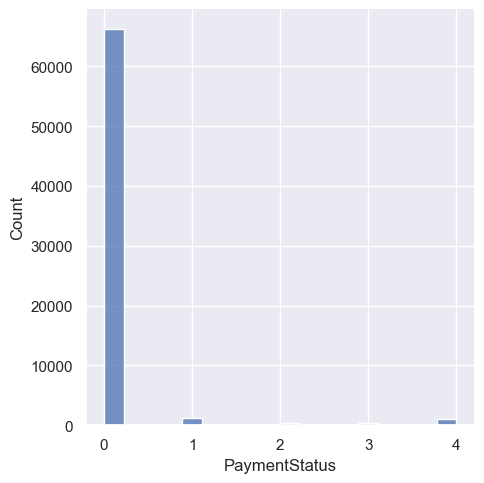

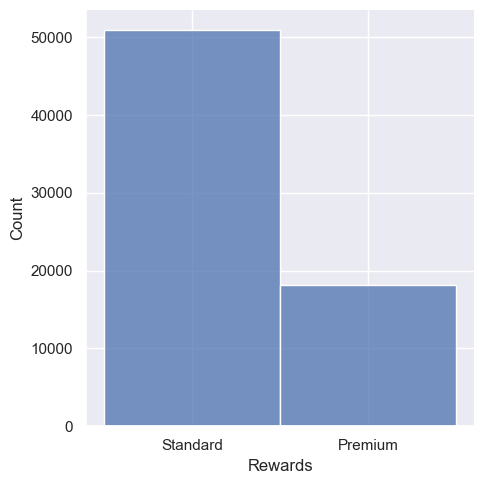

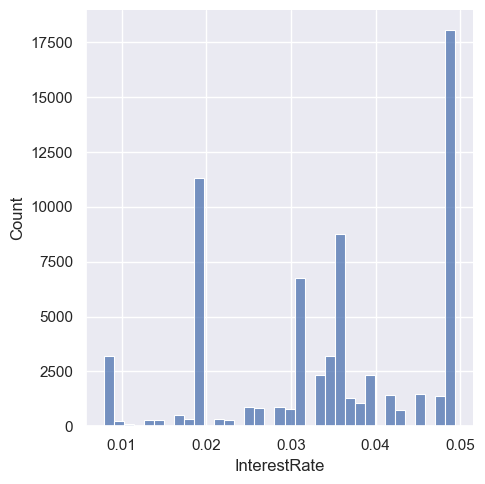

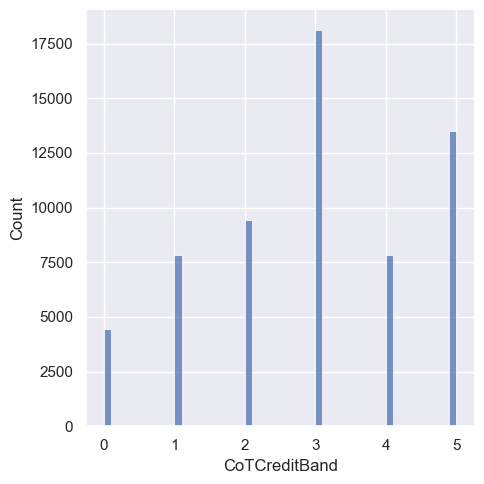

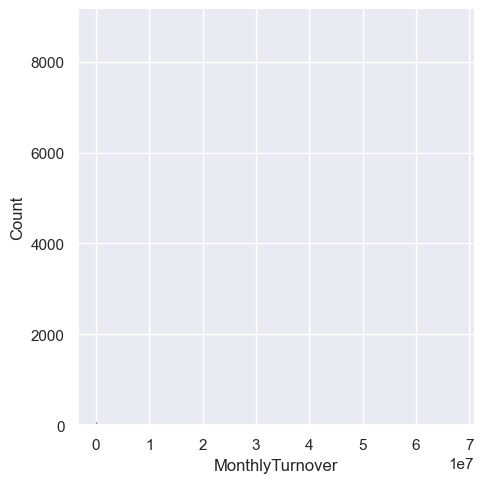

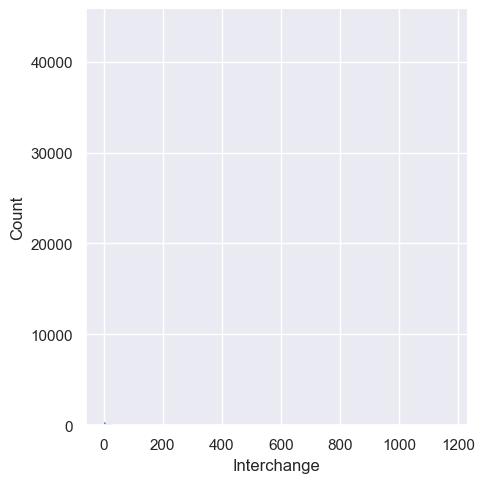

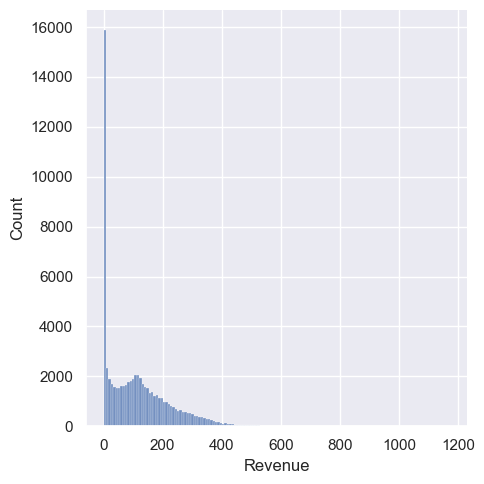

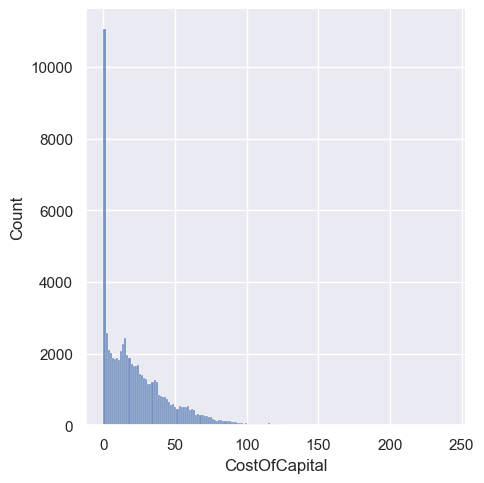

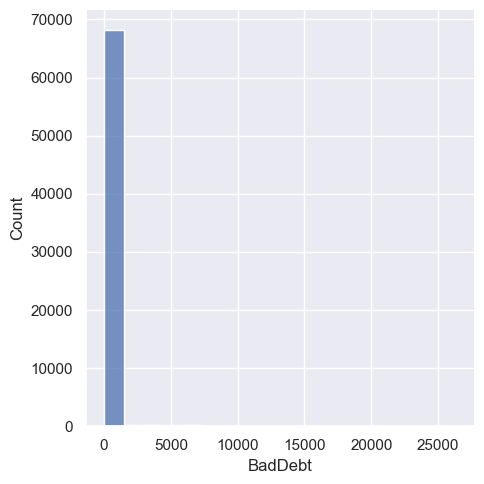

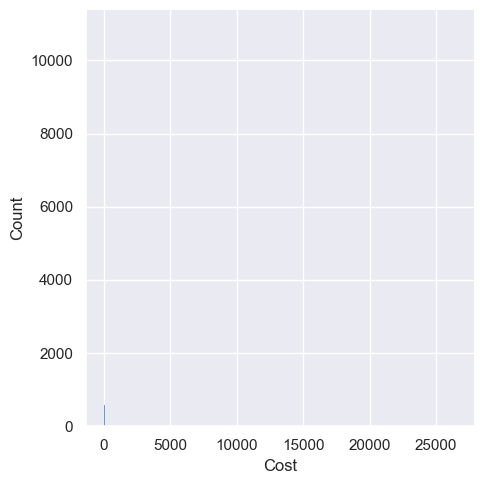

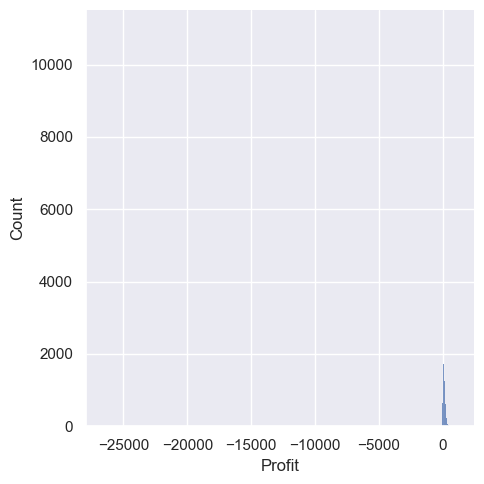

In [137]:
# Let's plot some distributions!
for column in list(df):
    sns.displot(df[column], kde=False)


In [579]:
by_customer = df[['CustomerId', 'BPnumber', 'Profit']]
# by_customer = by_customer.groupby(["CustomerId"])['Profit'].count()
by_customer = by_customer.groupby(["CustomerId"], sort=False, as_index=False)['Profit'].mean()

In [580]:
by_customer

,CustomerId,Profit
0,248401,0.221550
1,246102,131.114439
2,249501,199.256577
3,237401,24.651143
4,235763,110.865953
...,...,...
5760,275323,-4.769802
5761,199131,82.809569
5762,249992,23.261425
5763,290432,18.117527


''' 
Gamma-Gamma Model Fitting
=========================

After some research, the lifetimes python package may be appropriate to use for predicting LTV.
The following are required:

- The package requires transactional data in summary form, ie with columns:
    . frequency (count of billing periods customer made a transaction)
    . recency (age of customer when they made most recent transaction)
    . age (duration between customer's first transaction and end of period under study)
- The model assumes no correlation between monetary value and frequency. This is the first thing I will check

I will begin by attempting to model Interest and Interchange.
'''

In [635]:
customer_summary = df[['CustomerId', 'BadDebt', 'CostOfCapital', 'Interest', 'Interchange', 'MonthlyTurnover', 'Profit']].groupby(["CustomerId"], sort=False).agg(
    profit_count=pd.NamedAgg(column='Profit', aggfunc='count'),
    
    avg_baddebt=pd.NamedAgg(column='BadDebt', aggfunc='mean'),
    avg_costofcapital=pd.NamedAgg(column='CostOfCapital', aggfunc='mean'),
    avg_interest=pd.NamedAgg(column='Interest', aggfunc='mean'),
    avg_interchange=pd.NamedAgg(column='Interchange', aggfunc='mean'),
    avg_profit=pd.NamedAgg(column='Profit', aggfunc='mean'),
)

In [636]:
profit_freq = df.groupby('CustomerId').apply(lambda column: (column!=0).sum())['Profit']
interest_freq = df.groupby('CustomerId').apply(lambda column: (column!=0).sum())['Interest']
interchange_freq = df.groupby('CustomerId').apply(lambda column: (column!=0).sum())['Interchange']

In [637]:
merged = pd.merge(customer_summary, profit_freq, on=['CustomerId'])
merged = pd.merge(merged, interest_freq, on=['CustomerId'])
merged = pd.merge(merged, interchange_freq, on=['CustomerId'])

In [638]:
merged = merged.rename(columns={
    'Profit': 'profit_frequency',
    'Interest': 'interest_frequency',
    'Interchange': 'interchange_frequency'
})

In [639]:
merged.head()

,profit_count,avg_baddebt,avg_costofcapital,avg_interest,avg_interchange,avg_profit,profit_frequency,interest_frequency,interchange_frequency
CustomerId,,,,,,,,,
248401,12,0.0,0.063714,0.000000,0.285264,0.221550,8,0,6
246102,12,0.0,27.329410,157.559167,0.884682,131.114439,12,12,2
249501,12,0.0,38.210025,30.588333,206.878269,199.256577,12,3,12
237401,12,0.0,9.164321,0.000000,33.815464,24.651143,12,0,12
235763,12,0.0,18.807584,125.770000,3.903538,110.865953,8,7,5


In [640]:
interest_summary = merged[merged['avg_interest']>0][['avg_interest', 'interest_frequency']]
interchange_summary = merged[merged['avg_interchange']>0][['avg_interchange', 'interchange_frequency']]

In [641]:
entries = len(merged)
non_zero_interest = len(interest_summary)
non_zero_interchange = len(interchange_summary)

print(f'There are {entries - non_zero_interest} zero-interest entries')
print(f'There are {entries - non_zero_interchange} zero-interchange entries')

There are 902 zero-interest entries
There are 2017 zero-interchange entries


In [642]:
# Check for low correlation. This is one of the Gamma-Gamma assumptions.

interest_summary[['avg_interest', 'interest_frequency']].corr()

,avg_interest,interest_frequency
avg_interest,1.000000,0.596014
interest_frequency,0.596014,1.000000


In [643]:
interchange_summary[['avg_interchange', 'interchange_frequency']].corr()

,avg_interchange,interchange_frequency
avg_interchange,1.000000,0.354204
interchange_frequency,0.354204,1.000000


""" The correlations are high. So the assumption is incorrect and I cannot use 
the GammaGamme model. I will fit the models anyway, but I need to think of a new method.
"""

In [644]:
# Fit models

from lifetimes import GammaGammaFitter

In [645]:
interest_ggf = GammaGammaFitter(penalizer_coef = 0.001)
interest_ggf.fit(
    interest_summary['interest_frequency'],
    interest_summary['avg_interest']
)
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4863 subjects, p: 0.80, q: 0.22, v: 0.92>


In [646]:
interchange_ggf = GammaGammaFitter(penalizer_coef = 0.0)
interchange_ggf.fit(
    interchange_summary['interchange_frequency'],
    interchange_summary['avg_interchange']
)
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4863 subjects, p: 0.80, q: 0.22, v: 0.92>


""" 
Interest and Interchange Forecasting
====================================

Customer Lifetime Value = Expected revenue over next 12 months

I will train a model to predict the next month's Interest and Interchange, given 
historic data from all prior months. The model will be used to predict the next
12 months.
"""

In [647]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [648]:
df.head()

,CustomerId,DateStarted,BillingEndDate,BPnumber,ApprovedLimit,CardFunding,CashFunding,Balance,AverageBalanceInBP,Interest,...,Rewards,InterestRate,CoTCreditBand,MonthlyTurnover,Interchange,Revenue,CostOfCapital,BadDebt,Cost,Profit
0,248401,1/8/18,1/7/19,12,2500,20.00,0.0,20.00,18.06,0.00,...,Standard,0.0494,3.0,1875,0.326000,0.326000,0.113778,0.0,0.113778,0.212222
1,246102,1/8/18,6/7/19,17,4800,0.00,0.0,4424.17,4383.34,158.85,...,Standard,0.0356,0.0,2131,0.000000,158.850000,27.615042,0.0,27.615042,131.234958
2,249501,1/11/18,10/10/18,9,9600,2602.24,0.0,2941.12,5889.28,0.00,...,Premium,0.0187,4.0,109967,42.416512,42.416512,37.102464,0.0,37.102464,5.314048
3,237401,11/27/17,11/26/18,12,10000,1802.53,0.0,1802.53,1321.06,0.00,...,Standard,0.0394,5.0,33757,29.381239,29.381239,8.322678,0.0,8.322678,21.058561
4,235763,11/7/17,8/6/18,9,6000,0.00,0.0,4368.51,4236.88,212.97,...,Standard,0.0494,1.0,7491,0.000000,212.970000,26.692344,0.0,26.692344,186.277656


In [649]:
### Interest Modelling ###

# Feature Selection
X = df[['BPnumber', 'ApprovedLimit', 'CardFunding', 'CashFunding', 'Balance',
        'CoTCreditBand', 'MonthlyTurnover']]
y = df['Interest']
print(X)
print(y)

       BPnumber  ApprovedLimit  CardFunding  CashFunding   Balance  \
0            12           2500        20.00         0.00     20.00   
1            17           4800         0.00         0.00   4424.17   
2             9           9600      2602.24         0.00   2941.12   
3            12          10000      1802.53         0.00   1802.53   
4             9           6000         0.00         0.00   4368.51   
...         ...            ...          ...          ...       ...   
69175        21           4000      1703.02         0.00   1702.67   
69176        25           6000         0.00         0.00      0.00   
69177        21           4800       804.32      1736.48    804.35   
69178         7          20000     12031.61         0.00  12031.61   
69179        19          12000     11663.46         0.00  11431.64   

       CoTCreditBand  MonthlyTurnover  
0                3.0             1875  
1                0.0             2131  
2                4.0           109967  

""" 
Simplest Conceivable Model
==========================

LTV = Expected profit in next 12 months
    = { 0                                 ,    any recorded profit < 0
        Total profit in previous 12 months,    otherwise

Assumptions
-----------
- Customers will behave as they did in the previous 12 months


Shortcomings
------------

- Does not consider age of customer. A customer with many years service has less
risk than a new customer with the same transactions in the previous 12 months
- Does not consider the CoTCreditBand, a calulated risk score
- Does nothing to model potential growth/decline of a business. We would expect
a greater LTV from a customer who's monthly turnover has been growing, for e.g.
- Disregards potentially profitable customers who have rarely caused negative profit

"""

In [650]:
# define life_time_value custom aggregate function

def ltv(values):
    if min(values) < 0:
        return 0
    else:
        return sum(values)

In [703]:
# redefine customer summary, with total profit, and LTV

customer_summary = df[['CustomerId', 'ApprovedLimit', 'BadDebt', 'CostOfCapital', 'Interest', 'Interchange', 'MonthlyTurnover', 'Profit']].groupby(["CustomerId"], sort=False).agg(
    profit_count=pd.NamedAgg(column='Profit', aggfunc='count'),
    
    avg_approved_limit=pd.NamedAgg(column='ApprovedLimit', aggfunc='mean'),
    avg_baddebt=pd.NamedAgg(column='BadDebt', aggfunc='mean'),
    avg_costofcapital=pd.NamedAgg(column='CostOfCapital', aggfunc='mean'),
    avg_interest=pd.NamedAgg(column='Interest', aggfunc='mean'),
    avg_interchange=pd.NamedAgg(column='Interchange', aggfunc='mean'),
    avg_profit=pd.NamedAgg(column='Profit', aggfunc='mean'),
    avg_monthly_turnover=pd.NamedAgg(column='MonthlyTurnover', aggfunc='mean'),
    total_profit=pd.NamedAgg(column='Profit', aggfunc='sum'),
    
    LTV=pd.NamedAgg(column='Profit', aggfunc=ltv)
)

In [704]:
customer_summary.head()

,profit_count,avg_approved_limit,avg_baddebt,avg_costofcapital,avg_interest,avg_interchange,avg_profit,avg_monthly_turnover,total_profit,LTV
CustomerId,,,,,,,,,,
248401,12,2500.0,0.0,0.063714,0.000000,0.285264,0.221550,1875.000000,2.658595,0.000000
246102,12,4800.0,0.0,27.329410,157.559167,0.884682,131.114439,3348.166667,1573.373264,1573.373264
249501,12,10500.0,0.0,38.210025,30.588333,206.878269,199.256577,112580.750000,2391.078926,2391.078926
237401,12,10250.0,0.0,9.164321,0.000000,33.815464,24.651143,34674.500000,295.813711,295.813711
235763,12,4000.0,0.0,18.807584,125.770000,3.903538,110.865953,7491.000000,1330.391440,0.000000


Question 2 - average LTV for a customer
------------------------------------------------

In [614]:
average_ltv = customer_summary['LTV'].mean()
customer_summary['LTV'].describe()

count    5765.000000
mean      830.220369
std      1060.711104
min         0.000000
25%         0.000000
50%       317.108389
75%      1428.249124
max      7820.582667
Name: LTV, dtype: float64

LTV split by monthly turnover
----------------------------------

In [655]:
customer_summary['avg_monthly_turnover'].describe()

count    5.765000e+03
mean     5.171230e+04
std      9.450220e+05
min      1.000000e+03
25%      5.495417e+03
50%      1.342508e+04
75%      3.581325e+04
max      6.750000e+07
Name: avg_monthly_turnover, dtype: float64

<AxesSubplot: xlabel='avg_monthly_turnover', ylabel='LTV'>

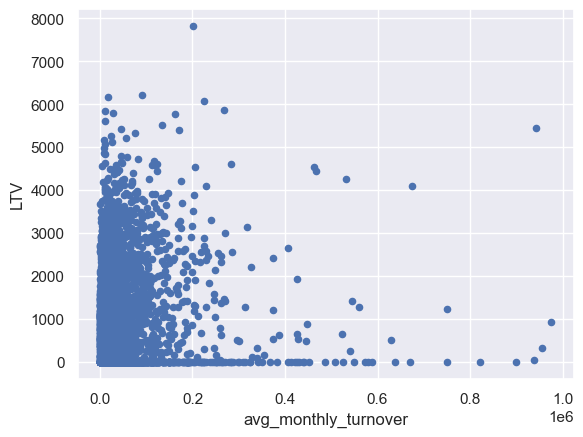

In [683]:
# plot distribution
truncated_for_plot_customer_summary = customer_summary[customer_summary['avg_monthly_turnover'] < 10**6]  # there are a few outliers with monthly_turnover >> mean
truncated_for_plot_customer_summary.plot.scatter(x = 'avg_monthly_turnover', y = 'LTV')

In [685]:
# calculate correlation
customer_summary[['avg_monthly_turnover', 'LTV']].corr()

,avg_monthly_turnover,LTV
avg_monthly_turnover,1.000000,-0.007085
LTV,-0.007085,1.000000


Question 3
3. One of the most powerful way to increase portfolio LTV is to increase the credit limit on a subset of customers and this has been done several times in the past. The CFO tells you that you can raise limits on any customers you like but due to funding constraints we can only generate additional balances of £1,000,000. Which customers would you chose and what limit increases would you give them? How much additional monthly value would be generated? Also consider risks involved and margin of error.

Plan
- Investigate historical effect on Revenue when Approved Limit has been increased
- Indentify customers who are on average, closest to spending their limits (probably little value in increasing limits for customers who don't spend majority of their limit)

Which customers and what limit increases?
- Different strategies could work well here
- Segment customers and identify the highest reward/ lowest reward group. Split additional balances amongst this group

,ApprovedLimit,Revenue
ApprovedLimit,1.00000,0.32832
Revenue,0.32832,1.00000


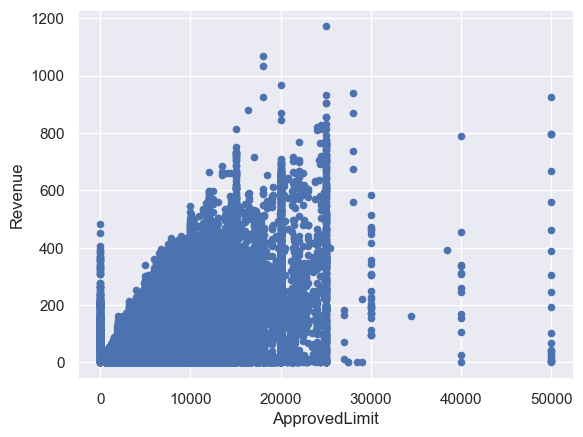

In [700]:
# Recall correlation between ApprovedLimit and calculated Revenue
df.plot.scatter(x = 'ApprovedLimit', y = 'Revenue')
df[['ApprovedLimit', 'Revenue']].corr()

<AxesSubplot: xlabel='avg_approved_limit', ylabel='LTV'>

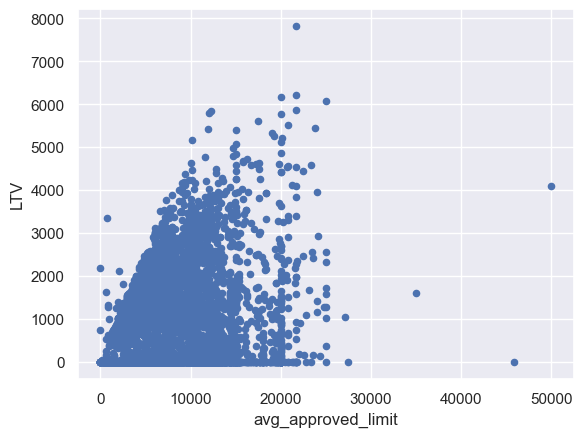

In [706]:
customer_summary.plot.scatter(x = 'avg_approved_limit', y = 'LTV')